In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [ ]:
print("Customers Dataset: \n",customers.head(3))

print("\nProducts Dataset: \n",products.head(3))

print("\nTransactions Dataset: \n",transactions.head(3))


Customers Dataset: 
   CustomerID      CustomerName         Region SignupDate SignupYearMonth
0      C0001  Lawrence Carroll  South America 2022-07-10         2022-07
1      C0002    Elizabeth Lutz           Asia 2022-02-13         2022-02
2      C0003    Michael Rivera  South America 2024-03-07         2024-03

Products Dataset: 
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12

Transactions Dataset: 
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   

   TotalValue   Price TransactionYearMonth TransactionMonth  TransactionYear  
0      300.68  300.68              2024-08       

In [ ]:
print("\nMissing Values in Customers: \n",customers.isnull().sum())

print("\nMissing Values in Products:\n",products.isnull().sum())

print("\nMissing Values in Transactions:\n",transactions.isnull().sum())


Missing Values in Customers: 
 CustomerID         0
CustomerName       0
Region             0
SignupDate         0
SignupYearMonth    0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID           0
CustomerID              0
ProductID               0
TransactionDate         0
Quantity                0
TotalValue              0
Price                   0
TransactionYearMonth    0
TransactionMonth        0
TransactionYear         0
dtype: int64


In [ ]:
print("Data Types in Customers , Products , Transactions:\n",customers.dtypes,"\n",products.dtypes,"\n",transactions.dtypes)

Data Types in Customers , Products , Transactions:
 CustomerID                 object
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
SignupYearMonth         period[M]
dtype: object 
 ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object 
 TransactionID                   object
CustomerID                      object
ProductID                       object
TransactionDate         datetime64[ns]
Quantity                         int64
TotalValue                     float64
Price                          float64
TransactionYearMonth         period[M]
TransactionMonth             period[M]
TransactionYear                  int32
dtype: object


In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

print("\nUpdated Data Types in Customers:")
print(customers.dtypes)

print("\nUpdated Data Types in Transactions:")
print(transactions.dtypes)

print("\nDuplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())

customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)



Updated Data Types in Customers:
CustomerID                 object
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
SignupYearMonth         period[M]
dtype: object

Updated Data Types in Transactions:
TransactionID                   object
CustomerID                      object
ProductID                       object
TransactionDate         datetime64[ns]
Quantity                         int64
TotalValue                     float64
Price                          float64
TransactionYearMonth         period[M]
TransactionMonth             period[M]
TransactionYear                  int32
dtype: object

Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0



Customer Count by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


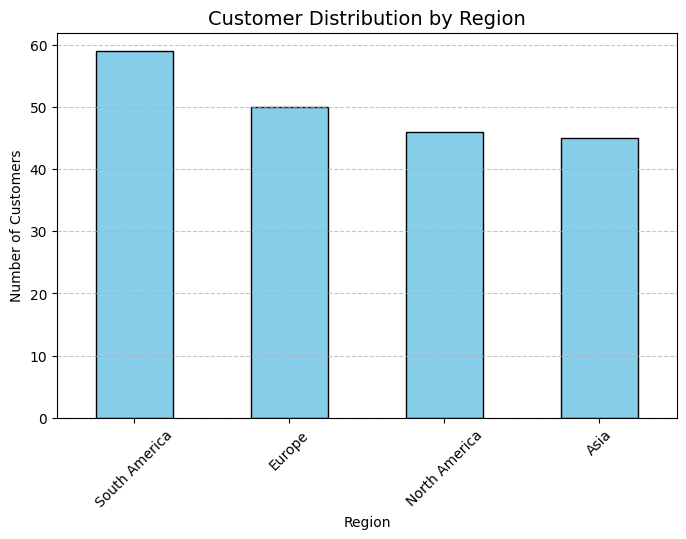

In [ ]:
# Customer count by region
region_counts = customers['Region'].value_counts()
print("\nCustomer Count by Region:")
print(region_counts)

plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Distribution by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




Total Sales by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


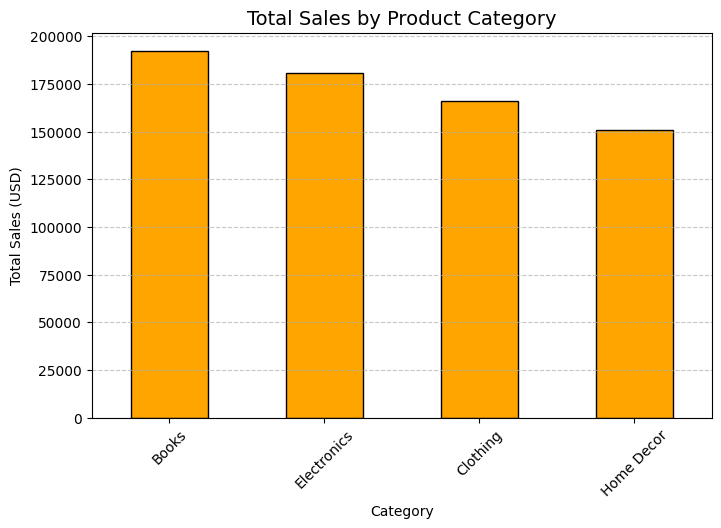

In [ ]:

# Sales by category
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:")
print(category_sales)

plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Total Sales by Product Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Monthly Transaction Volume:
TransactionYearMonth
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64


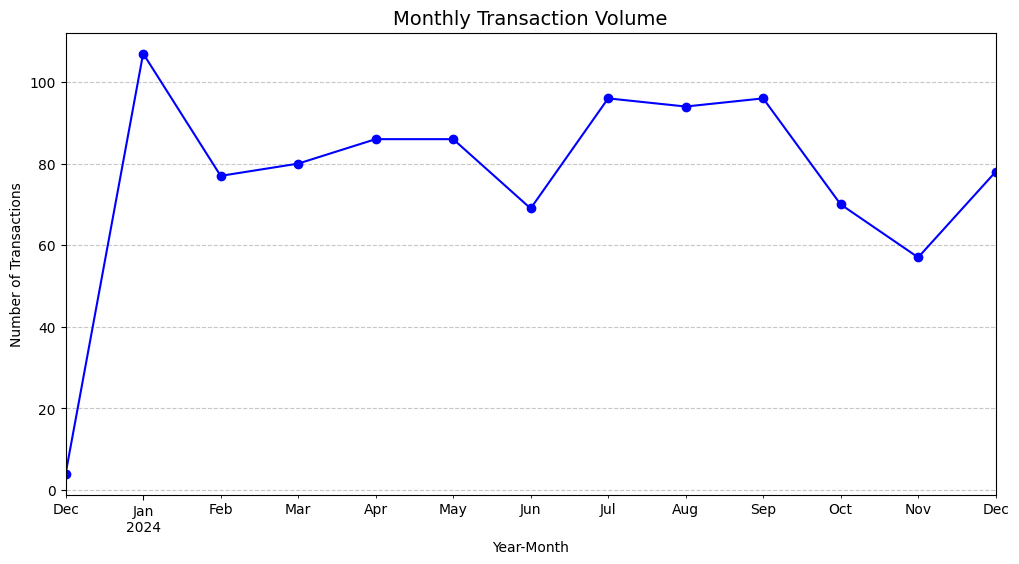

In [ ]:
transactions['TransactionYearMonth'] = transactions['TransactionDate'].dt.to_period('M')
transaction_volume = transactions['TransactionYearMonth'].value_counts().sort_index()
print("\nMonthly Transaction Volume:")
print(transaction_volume)

plt.figure(figsize=(12, 6))
transaction_volume.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Transaction Volume', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

TransactionMonth
2024-01    76
2024-05    72
2024-08    70
2024-02    65
2024-07    62
2024-06    61
2024-12    54
2024-09    51
2024-10    46
2024-03    45
2024-04    42
2024-11    37
Freq: M, Name: Quantity, dtype: int64


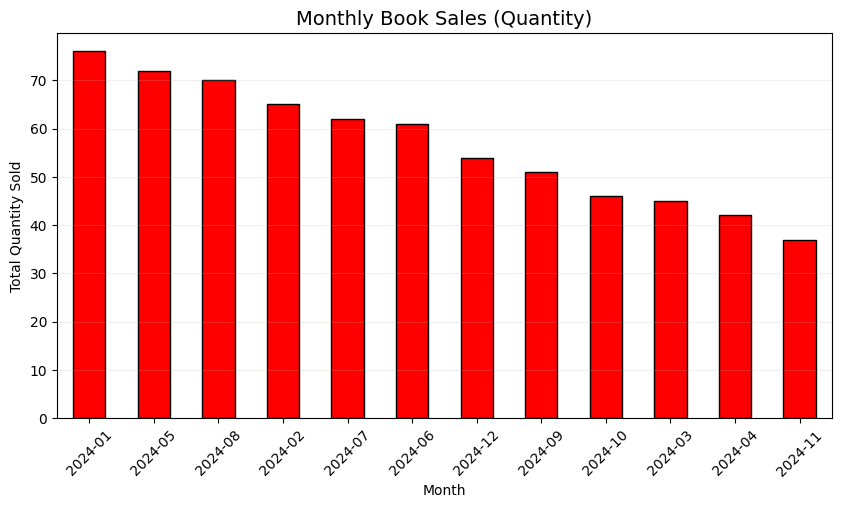

In [76]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
books_transactions = transactions.merge(products, on='ProductID')
books_sales = books_transactions[books_transactions['Category'] == 'Books']
monthly_books_sales = books_sales.groupby('TransactionMonth')['Quantity'].sum().sort_values(ascending=False)
print(monthly_books_sales)
#figura
plt.figure(figsize=(10, 5))
monthly_books_sales.plot(kind='bar', color='red', edgecolor='black')
plt.title('Monthly Book Sales (Quantity)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.2)
plt.show()



July 2024 Revenue by Category:
Category
Electronics    22096.51
Books          18501.32
Clothing       16616.25
Home Decor     14152.31
Name: TotalValue, dtype: float64


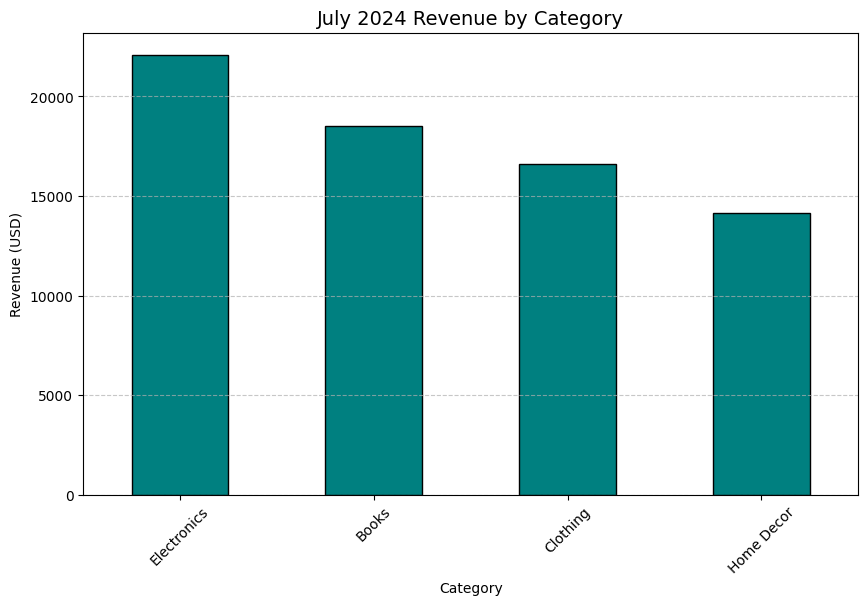

In [78]:
july_transactions = transactions[transactions['TransactionYearMonth'] == '2024-07']
july_transactions = july_transactions.merge(products, on='ProductID')
july_category_revenue = july_transactions.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nJuly 2024 Revenue by Category:")
print(july_category_revenue)
plt.figure(figsize=(10, 6))
july_category_revenue.plot(kind='bar', color='teal', edgecolor='black')
plt.title('July 2024 Revenue by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-73-e74a2c597a96>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_products, x='ProductName', y='Quantity', palette='Blues_d')


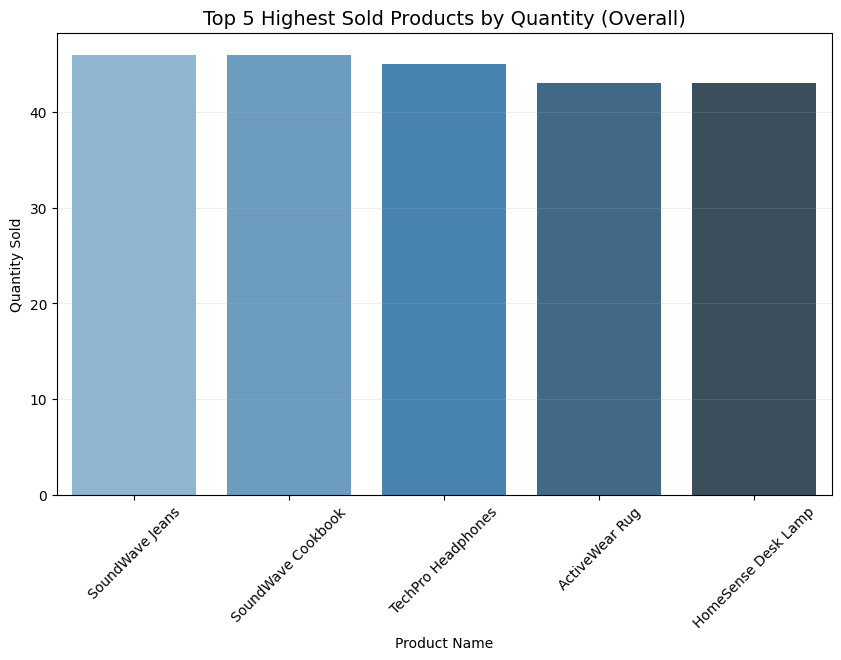

In [ ]:
product_sales = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
top_5_products = product_sales.head(5).reset_index().merge(products[['ProductID', 'ProductName']], on='ProductID')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_products, x='ProductName', y='Quantity', palette='Blues_d')
plt.title('Top 5 Highest Sold Products by Quantity (Overall)', fontsize=14)
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y',alpha=0.2)
plt.show()


In [ ]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_customers = transactions.groupby('TransactionMonth')['CustomerID'].unique()

retained_customers = {}
for i in range(1, len(monthly_customers)):
    prev_month_customers = set(monthly_customers.iloc[i-1])
    current_month_customers = set(monthly_customers.iloc[i])
    retained = prev_month_customers.intersection(current_month_customers)
    retention_rate = len(retained) / len(prev_month_customers) * 100
    retained_customers[monthly_customers.index[i]] = retention_rate

print("\nCustomer Retention Rate by Month (%):")
for month, rate in retained_customers.items():
    print(f"{month}: {rate:.2f}%")



Customer Retention Rate by Month (%):
2024-01: 75.00%
2024-02: 27.71%
2024-03: 37.88%
2024-04: 24.62%
2024-05: 30.00%
2024-06: 28.36%
2024-07: 43.33%
2024-08: 37.50%
2024-09: 33.33%
2024-10: 28.77%
2024-11: 20.00%
2024-12: 30.61%


In [ ]:
transactions['TransactionYear'] = transactions['TransactionDate'].dt.year
yearly_customers = transactions['CustomerID'].unique()
total_customers = len(yearly_customers)
monthly_customers = transactions.groupby('CustomerID')['TransactionMonth'].nunique()
return_customers = monthly_customers[monthly_customers > 1].index
return_customers_count = len(return_customers)
return_customers_percentage = (return_customers_count / total_customers) * 100
print(f"\nPercentage of Customers Who Returned (Made Multiple Purchases): {return_customers_percentage:.2f}%")



Percentage of Customers Who Returned (Made Multiple Purchases): 93.47%


In [ ]:
region_performance = merged_data.groupby('Region').agg(
    total_revenue=('TotalValue', 'sum'),
    total_customers=('CustomerID', 'nunique')
).reset_index()

region_performance_sorted = region_performance.sort_values(by='total_revenue', ascending=False)

print(region_performance_sorted)


          Region  total_revenue  total_customers
3  South America      219352.56               59
1         Europe      166254.63               50
2  North America      152313.40               46
0           Asia      152074.97               44


  ProductID  total_revenue         ProductName
0      P029       19513.80  TechPro Headphones
1      P079       17946.91      ActiveWear Rug
2      P048       17905.20    TechPro Cookbook
3      P020       15060.92   ActiveWear Jacket
4      P062       14592.24     HomeSense Novel


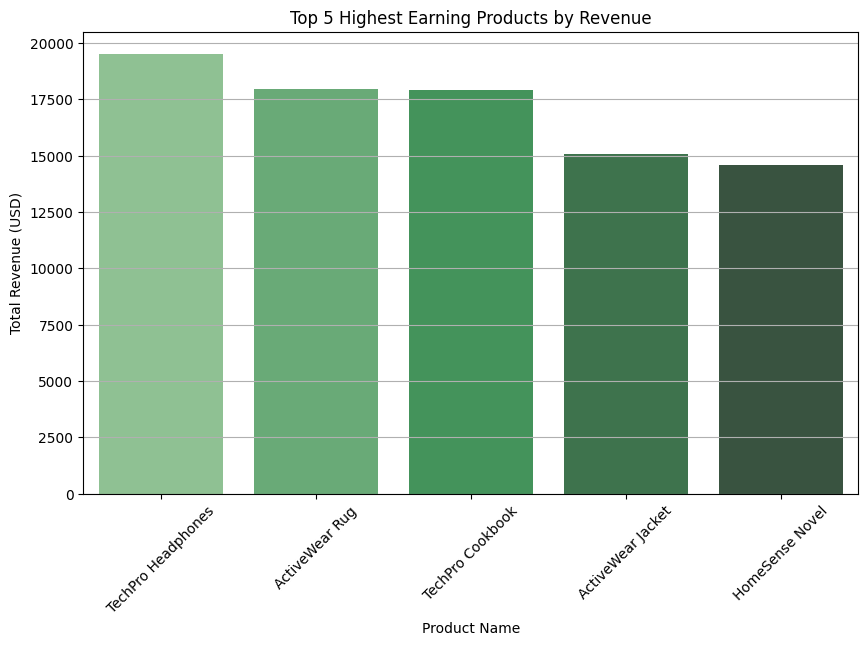

In [79]:
merged_data = transactions.merge(products, on="ProductID").merge(customers, on="CustomerID")
product_revenue = merged_data.groupby('ProductID').agg(total_revenue=('TotalValue', 'sum')).nlargest(5, 'total_revenue').reset_index().merge(products[['ProductID', 'ProductName']], on='ProductID')
print(product_revenue)
plt.figure(figsize=(10, 6))
sns.barplot(data=product_revenue, x='ProductName', y='total_revenue', palette='Greens_d')
plt.title('Top 5 Highest Earning Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
revenue_per_customer = merged_data.groupby('CustomerID').agg(total_revenue=('TotalValue', 'sum'), average_revenue=('TotalValue', 'mean'), total_quantity=('Quantity', 'sum')).reset_index()
revenue_per_customer_sorted = revenue_per_customer.sort_values(by='total_revenue', ascending=False)
revenue_per_customer_sorted = revenue_per_customer_sorted.merge(customers[['CustomerID', 'CustomerName']], on='CustomerID')

print("\nTop 10 Most Valuable Customers (By Total Revenue):")
print(revenue_per_customer_sorted[['CustomerName', 'total_revenue']].head(10))



Top 10 Most Valuable Customers (By Total Revenue):
           CustomerName  total_revenue
0          Paul Parsons       10673.87
1          Bruce Rhodes        8040.39
2          Gerald Hines        7663.70
3         William Adams        7634.45
4          Aimee Taylor        7572.91
5             Anna Ball        7111.32
6  Mrs. Kimberly Wright        7073.28
7         Jennifer Pena        6819.57
8          Rodney Eaton        6715.72
9         Juan Mcdaniel        6708.10
